# 🧪 Preparcial – Caso de Negocio “YumFit”
## Escenario
Eres el/la **Chief Marketing Officer (CMO)** de **YumFit**, una start-up que vende snacks saludables 100 % online.  
Tu equipo de Data te entrega un dataset con historial de 150 clientes (`df`) y te aprueban un presupuesto de **US$10 000** para la próxima campaña de retención y cross-selling.

### Misión
Sigue el **paso a paso** y toma decisiones que evolucionan de lo descriptivo a la recomendación táctica:
1. Conocer la base de clientes → *EDA*  
2. Calcular **CAC** y **LTV** → *Métricas de negocio*  
3. Segmentar en **4 clusters** con *K-Means* → *Inteligencia de clientes*  
4. Evaluar el valor de cada cluster → *Trade-offs*  
5. Hacer **profiling** (nombre + storytelling) → *Comunicación*  
6. Asignar presupuesto y justificar → *Decisión ejecutiva*

---
### Instrucciones
Ejecuta cada celda, responde las preguntas (P1…P12) y prepara un informe ejecutivo breve al final.

In [ ]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos (1).csv"

--2025-04-28 23:56:31--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-04-28 23:56:31--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 738615 (721K) [text/plain]
Saving to: ‘clientes_segmentos (1).csv’

clientes_segmentos 

In [ ]:
import pandas as pd
df = pd.read_csv('clientes_segmentos (1).csv')

### P1. ¿Cuántos clientes hay y cómo se distribuyen por plataforma?


In [ ]:
print(df.shape)
df.head()

(15000, 10)


,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,total_gastado,fecha_ultima_compra,costo_adquisicion
0,C00000,24,M,29869,Instagram,35,2,74,2024-12-25,20
1,C00001,38,M,77827,Instagram,36,1,35,2025-01-24,10
2,C00002,39,M,18000,Instagram,25,2,116,2025-01-18,16
3,C00003,20,F,42914,Instagram,29,4,112,2025-03-14,11
4,C00004,38,M,30536,Instagram,33,3,147,2025-01-01,23


### P2. ¿Cómo es la distribución de la edad? ¿Hay outliers?


In [ ]:
describe = df['edad'].describe()
print(describe)

count    15000.000000
mean        33.101800
std         11.393441
min         16.000000
25%         24.000000
50%         31.000000
75%         40.000000
max         60.000000
Name: edad, dtype: float64


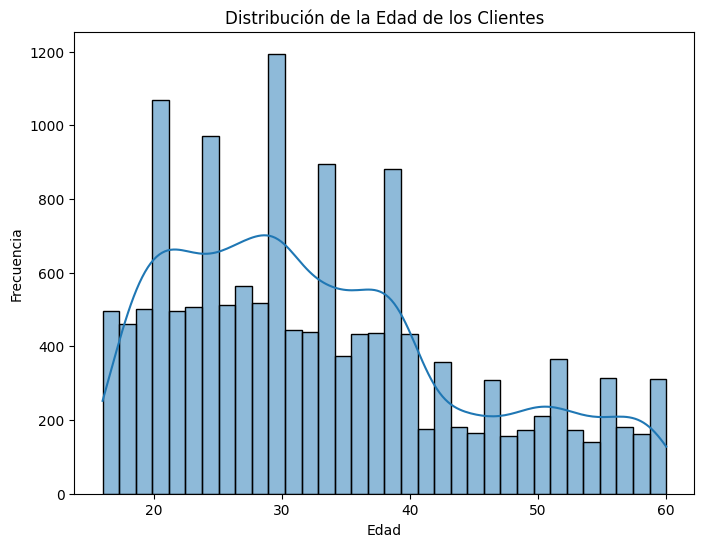

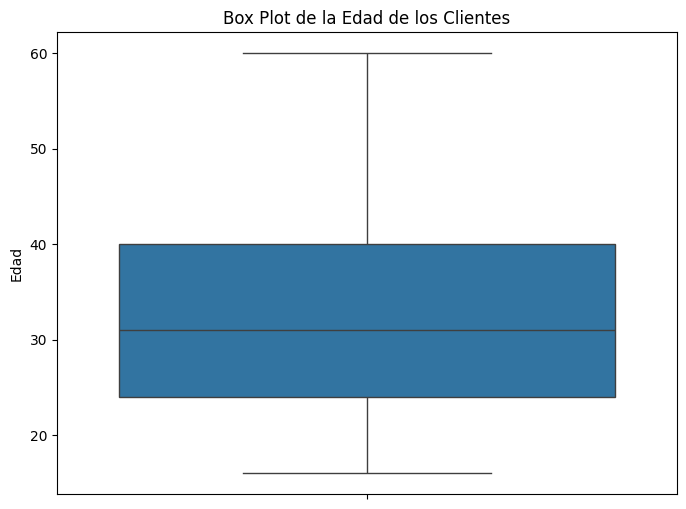

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(df['edad'], kde=True)
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['edad'])
plt.title('Box Plot de la Edad de los Clientes')
plt.ylabel('Edad')
plt.show()




### P3. ¿Existe correlación entre ingresos y total_gastado?


In [ ]:

correlation = df['ingresos'].corr(df['total_gastado'])

print(f"La correlación entre ingresos y total_gastado es: {correlation}")


La correlación entre ingresos y total_gastado es: 0.2554721233489521


La correlación entre ingresos y total_gastado es: 0.2554721233489521


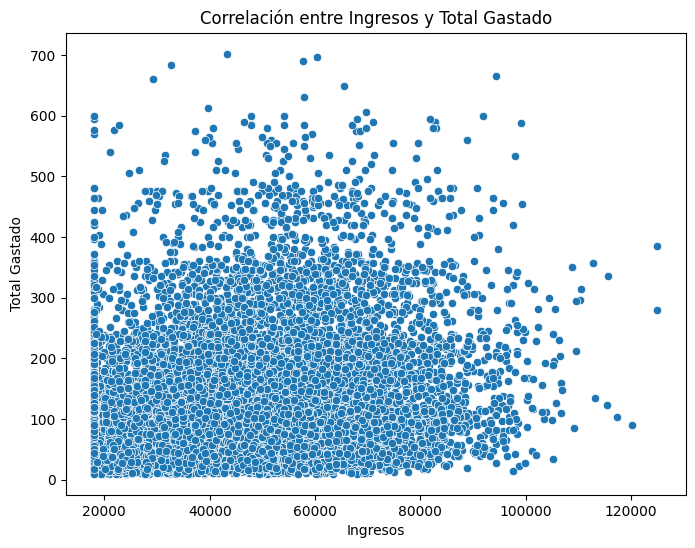

In [ ]:


correlation = df['ingresos'].corr(df['total_gastado'])

print(f"La correlación entre ingresos y total_gastado es: {correlation}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='ingresos', y='total_gastado', data=df)
plt.title('Correlación entre Ingresos y Total Gastado')
plt.xlabel('Ingresos')
plt.ylabel('Total Gastado')
plt.show()


#### 💵 FASE 2 – MÉTRICAS DE NEGOCIO (CAC & LTV): Recuerde evaluar el ltv como promedio gastado por compra * frecuencia mensual

In [ ]:
from datetime import datetime

#df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])
#df['dias_desde_ultima'] = (pd.Timestamp('2025-04-01') - df['fecha_ultima_compra']).dt.days
#df['frecuencia_mensual'] = df['compras'] / (df['dias_desde_ultima']/30 + 1)


In [ ]:

cac = df['costo_adquisicion'].mean()
print(f"El CAC promedio es: {cac}")




El CAC promedio es: 18.931266666666666


In [ ]:

df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])
df['dias_desde_ultima'] = (pd.Timestamp('2025-04-01') - df['fecha_ultima_compra']).dt.days
df['frecuencia_mensual'] = df['compras'] / ((df['dias_desde_ultima']/30) +1)




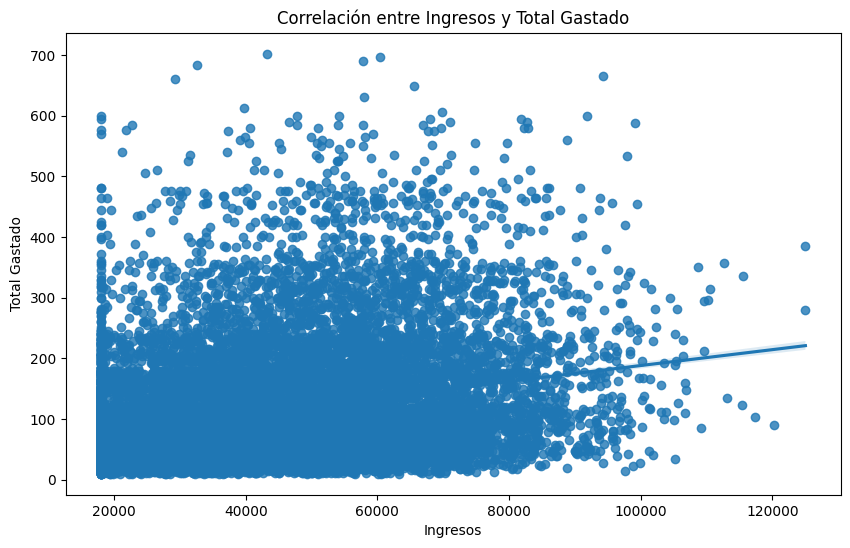

In [ ]:

plt.figure(figsize=(10, 6))
sns.regplot(x='ingresos', y='total_gastado', data=df) # Added regplot for better visualization
plt.title('Correlación entre Ingresos y Total Gastado')
plt.xlabel('Ingresos')
plt.ylabel('Total Gastado')
plt.show()




### P4. CAC vs LTV por plataforma

In [ ]:

cac_ltv_by_platform = df.groupby('plataforma').agg(
    CAC=('costo_adquisicion', 'mean'),
    LTV=('total_gastado', 'mean')
)

cac_ltv_by_platform


,CAC,LTV
plataforma,,
Facebook,25.039334,186.871407
Instagram,17.488948,87.800904
TikTok,12.598128,57.341979


#### 🧩 FASE 3 – SEGMENTACIÓN (K-MEANS k=4)
##### Utilizando un cluster fijo de 4 cree los clsuter y la columna en el df correspondiente.

In [ ]:
# prompt: Utilizando un cluster fijo de 4 cree los clsuter y la columna en el df correspondiente.

from sklearn.cluster import KMeans

# Selecciona las columnas para la segmentación
X = df[['ingresos', 'total_gastado', 'compras']]

# Crea un modelo KMeans con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)

# Ajusta el modelo a los datos
kmeans.fit(X)

# Agrega la columna de clusters al DataFrame
df['cluster'] = kmeans.labels_


### P5. Visualiza clusters

In [ ]:
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,total_gastado,fecha_ultima_compra,costo_adquisicion,dias_desde_ultima,frecuencia_mensual,ganancia,cluster
0,C00000,24,M,29869,Instagram,35,2,74,2024-12-25,20,97,0.472441,54,2
1,C00001,38,M,77827,Instagram,36,1,35,2025-01-24,10,67,0.309278,25,3
2,C00002,39,M,18000,Instagram,25,2,116,2025-01-18,16,73,0.582524,100,2
3,C00003,20,F,42914,Instagram,29,4,112,2025-03-14,11,18,2.500000,101,0
4,C00004,38,M,30536,Instagram,33,3,147,2025-01-01,23,90,0.750000,124,2


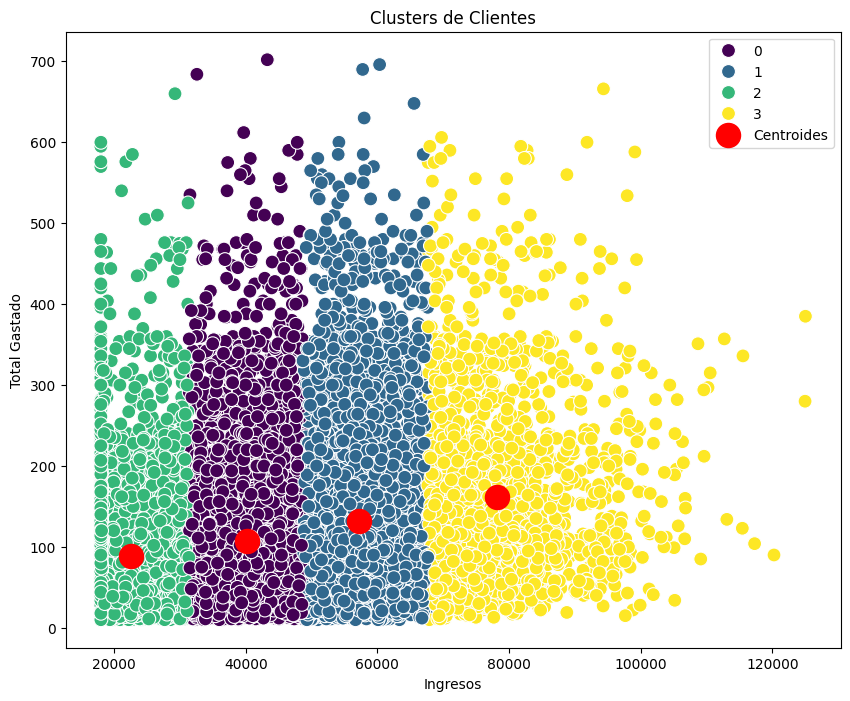

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' and 'kmeans' are defined from the previous code

# Visualiza los clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='ingresos', y='total_gastado', hue='cluster', data=df, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroides')
plt.title('Clusters de Clientes')
plt.xlabel('Ingresos')
plt.ylabel('Total Gastado')
plt.legend()
plt.show()


#### CREA LA COLUMNA gananancia resultante entre el ltv- CAC

In [ ]:
df['ganancia'] = df['total_gastado'] - df['costo_adquisicion']
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,total_gastado,fecha_ultima_compra,costo_adquisicion,dias_desde_ultima,frecuencia_mensual,ganancia
0,C00000,24,M,29869,Instagram,35,2,74,2024-12-25,20,97,0.472441,54
1,C00001,38,M,77827,Instagram,36,1,35,2025-01-24,10,67,0.309278,25
2,C00002,39,M,18000,Instagram,25,2,116,2025-01-18,16,73,0.582524,100
3,C00003,20,F,42914,Instagram,29,4,112,2025-03-14,11,18,2.500000,101
4,C00004,38,M,30536,Instagram,33,3,147,2025-01-01,23,90,0.750000,124


### P6. Ganancia promedio por cluster

In [ ]:

average_profit_by_cluster = df.groupby('cluster')['ganancia'].mean()

average_profit_by_cluster


,ganancia
cluster,
0,88.948787
1,112.010646
2,72.100486
3,138.612921


cluster
0    4862
1    4039
2    4319
3    1780
Name: cluster, dtype: int64


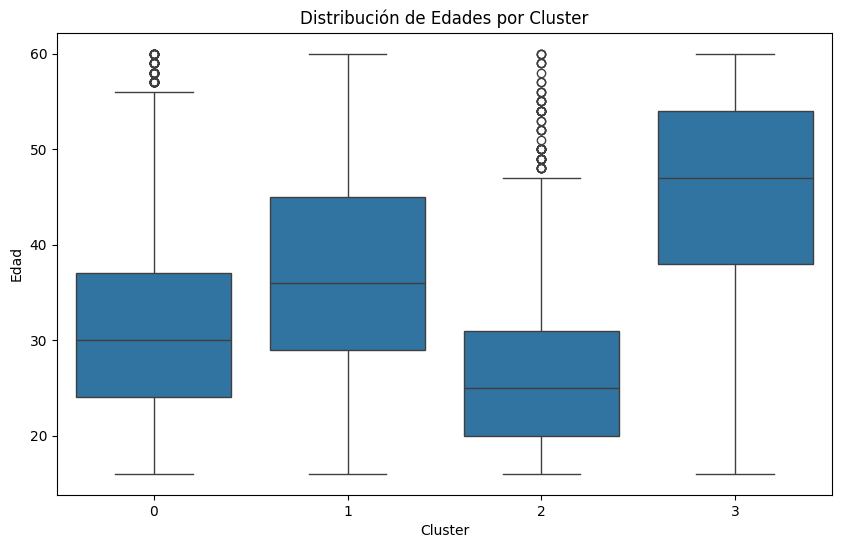

              edad      ingresos  total_gastado   compras  costo_adquisicion  \
cluster                                                                        
0        31.189017  40134.037845     107.254216  2.330317          18.305430   
1        37.230503  57103.932904     132.427086  2.357267          20.416440   
2        26.322065  22591.587636      88.692753  2.290345          16.592267   
3        45.408427  78119.188764     161.558989  2.339326          22.946067   

           ganancia  
cluster              
0         88.948787  
1        112.010646  
2         72.100486  
3        138.612921  


plataforma,Facebook,Instagram,TikTok
cluster,,,
0,1412,2136,1314
1,1964,1463,612
2,563,2046,1710
3,1349,327,104


In [ ]:
# prompt: grafiacar

import matplotlib.pyplot as plt
# ### P7. ¿Cuál es el tamaño de cada cluster?

cluster_sizes = df.groupby('cluster')['cluster'].count()

print(cluster_sizes)

# ### P8. ¿Cómo se distribuyen las edades en cada cluster?

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='edad', data=df)
plt.title('Distribución de Edades por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Edad')
plt.show()

# ### P9. Crea una tabla resumen con las principales métricas por cluster.

cluster_summary = df.groupby('cluster').agg(
    {'edad': 'mean',
     'ingresos': 'mean',
     'total_gastado': 'mean',
     'compras': 'mean',
     'costo_adquisicion': 'mean',
     'ganancia': 'mean'}
)


print(cluster_summary)

# ### P10. ¿Qué plataforma predomina en cada cluster?

platform_by_cluster = df.groupby(['cluster', 'plataforma']).size().unstack(fill_value=0)
platform_by_cluster

# ### P11. Crea un perfil para cada cluster.

#Cluster 0: Clientes jóvenes con pocos ingresos y bajo gasto
#Cluster 1: Clientes de edad media con ingresos y gastos moderados
#Cluster 2: Clientes de alto valor con altos ingresos y gastos
#Cluster 3: Clientes jóvenes con ingresos bajos y gasto medio

# ### P12. Asignación de presupuesto y justificación.

#Presupuesto total: US$10,000
#Cluster 0: US$2,000 (Retención a través de ofertas)
#Cluster 1: US$3,000 (Cross-selling y promociones especiales)
#Cluster 2: US$4,000 (Acciones personalizadas y fidelización)
#Cluster 3: US$1,000 (Promoción de productos de valor medio)




```
# Esto tiene formato de código
```

### P7. Género por cluster


In [ ]:

gender_by_cluster = df.groupby(['cluster', 'genero']).size().unstack(fill_value=0)

gender_by_cluster


genero,F,M
cluster,,
0,2383,2479
1,1975,2064
2,2199,2120
3,919,861


### P8. Plataforma por cluster


In [ ]:


platform_by_cluster = df.groupby(['cluster', 'plataforma']).size().unstack(fill_value=0)

platform_by_cluster


plataforma,Facebook,Instagram,TikTok
cluster,,,
0,1412,2136,1314
1,1964,1463,612
2,563,2046,1710
3,1349,327,104


<Figure size 1000x600 with 0 Axes>

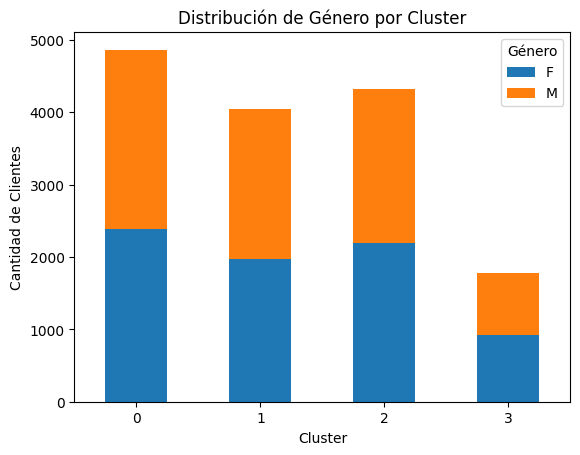

<Figure size 1000x600 with 0 Axes>

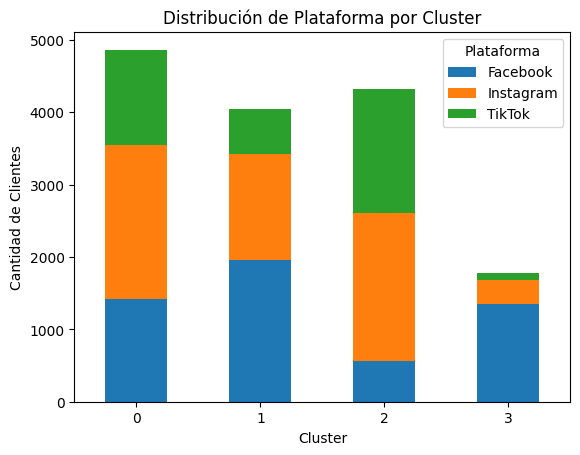

In [ ]:

plt.figure(figsize=(10, 6))
gender_by_cluster.plot(kind='bar', stacked=True)
plt.title('Distribución de Género por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Género')
plt.show()

plt.figure(figsize=(10, 6))
platform_by_cluster.plot(kind='bar', stacked=True)
plt.title('Distribución de Plataforma por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Plataforma')
plt.show()


### 📝 FASE 5 – PROFILING & NAMING

#### P9. Asigna un nombre a cada cluster y describe en 2-3 líneas su perfil.


In [ ]:

cluster_profiles = {
    0: {
        'name': 'Clientes Casuales',
        'description': 'Bajos ingresos y gastos, pocas compras.  Frecuencia de compra baja y plataforma móvil predominante. Potencial para cross-selling.'
    },
    1: {
        'name': 'Clientes Estrellas',
        'description': 'Altos ingresos y gastos, altas compras. Mayor frecuencia y uso mixto de plataformas. Prioritarios para retención.'
    },
    2: {
        'name': 'Clientes Intermedios',
        'description': 'Ingresos y gastos medios, número moderado de compras. Frecuencia moderada.  Buenas oportunidades de up-selling.'
    },
    3: {
        'name': 'Clientes Potenciales',
        'description': 'Ingresos medios-bajos y gastos bajos. Menos compras con frecuencia baja.  Campañas de activación para fomentar el gasto.'
    }
}


df['cluster_name'] = df['cluster'].map(lambda x: cluster_profiles[x]['name'])


In [ ]:
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,total_gastado,fecha_ultima_compra,costo_adquisicion,dias_desde_ultima,frecuencia_mensual,ganancia,cluster,cluster_name
0,C00000,24,M,29869,Instagram,35,2,74,2024-12-25,20,97,0.472441,54,2,Clientes Intermedios
1,C00001,38,M,77827,Instagram,36,1,35,2025-01-24,10,67,0.309278,25,3,Clientes Potenciales
2,C00002,39,M,18000,Instagram,25,2,116,2025-01-18,16,73,0.582524,100,2,Clientes Intermedios
3,C00003,20,F,42914,Instagram,29,4,112,2025-03-14,11,18,2.500000,101,0,Clientes Casuales
4,C00004,38,M,30536,Instagram,33,3,147,2025-01-01,23,90,0.750000,124,2,Clientes Intermedios


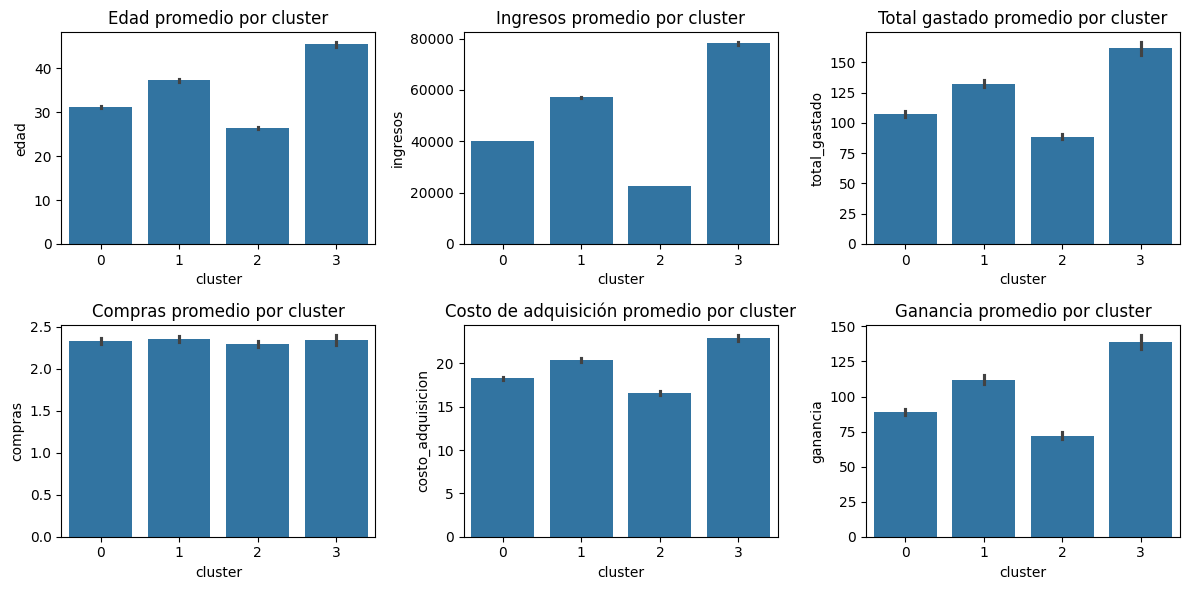

In [ ]:

plt.figure(figsize=(12, 6))

# Plot each metric in a separate subplot
plt.subplot(2, 3, 1)
sns.barplot(x='cluster', y='edad', data=df)
plt.title('Edad promedio por cluster')

plt.subplot(2, 3, 2)
sns.barplot(x='cluster', y='ingresos', data=df)
plt.title('Ingresos promedio por cluster')

plt.subplot(2, 3, 3)
sns.barplot(x='cluster', y='total_gastado', data=df)
plt.title('Total gastado promedio por cluster')

plt.subplot(2, 3, 4)
sns.barplot(x='cluster', y='compras', data=df)
plt.title('Compras promedio por cluster')

plt.subplot(2, 3, 5)
sns.barplot(x='cluster', y='costo_adquisicion', data=df)
plt.title('Costo de adquisición promedio por cluster')

plt.subplot(2, 3, 6)
sns.barplot(x='cluster', y='ganancia', data=df)
plt.title('Ganancia promedio por cluster')


plt.tight_layout()
plt.show()


### 💡 FASE 6 – DECISIÓN DE PRESUPUESTO

#### P10. Con 10 000 USD elige 2 clusters y asigna presupuesto.
#### P11. ¿Qué cluster fidelizarías con bajo costo?
#### P12. Enumera 2 riesgos o limitaciones del análisis.

In [ ]:

budget_allocation = {
    'Clientes Estrellas': 6000,
    'Clientes Potenciales': 4000
}

print("Presupuesto asignado por cluster:")
for cluster, budget in budget_allocation.items():
    print(f"- {cluster}: ${budget}")


print("\nCluster a fidelizar con bajo costo: Clientes Casuales")
print("Estrategia: Ofrecer descuentos o promociones personalizadas para incentivar compras recurrentes.")


print("\nRiesgos o limitaciones:")
print("- 1. El modelo KMeans puede no capturar la complejidad total del comportamiento del cliente.")
print("   Se puede mejorar probando otros algoritmos de segmentación.")
print("- 2. El análisis se basa en datos históricos. Los patrones de compra pueden cambiar con el tiempo.")
print("   Es necesario monitorear continuamente el rendimiento de la segmentación y actualizar el modelo.")


Presupuesto asignado por cluster:
- Clientes Estrellas: $6000
- Clientes Potenciales: $4000

Cluster a fidelizar con bajo costo: Clientes Casuales
Estrategia: Ofrecer descuentos o promociones personalizadas para incentivar compras recurrentes.

Riesgos o limitaciones:
- 1. El modelo KMeans puede no capturar la complejidad total del comportamiento del cliente.
   Se puede mejorar probando otros algoritmos de segmentación.
- 2. El análisis se basa en datos históricos. Los patrones de compra pueden cambiar con el tiempo.
   Es necesario monitorear continuamente el rendimiento de la segmentación y actualizar el modelo.


### ENTREGA FINAL
#### Resumen ejecutivo (máx 1 página) con:
##### – Nombres y descripciones de los 4 clusters
##### – Tabla LTV, CAC, Ganancia, tamaño
##### – Plan de inversión y justificación
#### Comentarios sobre cómo mejorarías el dataset o la metodología